# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [265]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [266]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [267]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [268]:
# Create a Beautiful Soup Object
html=browser.html
soup=soup(html,'html.parser')

In [292]:
# Extract all rows of data
all_data=soup.find_all('table',class_='table')
all_data

[<table class="table">
 <tbody><tr>
 <th>id</th>
 <th>terrestrial_date</th>
 <th>sol</th>
 <th>ls</th>
 <th>month</th>
 <th>min_temp</th>
 <th>pressure</th>
 </tr>
 <tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>
 <tr class="data-row">
 <td

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [293]:
# Create an empty list
data_rows = []

#Extracting all the row data
row_data = soup.find_all('tr', class_='data-row')

# Loop through the scraped data to create a list of rows
for row in row_data:
    cell_values = row.find_all("td")
    values = []
    for value in cell_values:
        values.append(value.text)
    data_rows.append(values)

data_rows

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [294]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data_rows, columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])


In [295]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [296]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [297]:
# Change data types for data analysis
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Convert 'sol', 'ls', and 'month' to integers
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)

# Convert 'min_temp' and 'pressure' to float
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

In [298]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [299]:
# 1. How many months are there on Mars?
month_mars=len(df["month"].unique())
print(month_mars)


12


In [300]:
# 2. How many Martian days' worth of data are there?
martian_days=df["id"].count()
print(martian_days)

1867


In [301]:
# 3. What is the average low temperature by month?
temp=df.groupby("month")[["min_temp"]].mean()
temp_df

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


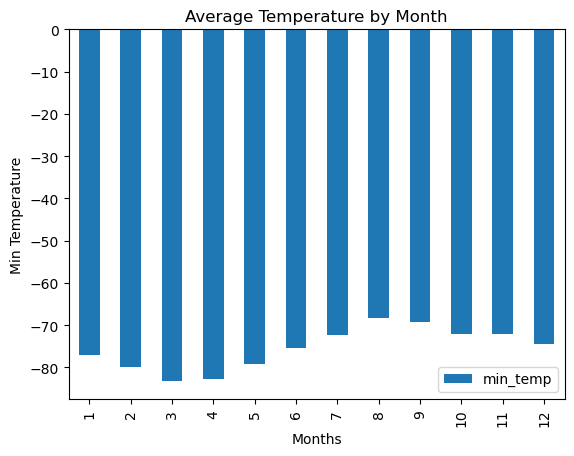

In [302]:
# Plot the average temperature by month
# Plotting the data
plot = temp_df.plot(kind='bar', title="Average Temperature by Month", xlabel="Months", ylabel="Min Temperature")

# Display the plot
plt.show()

In [303]:
# Identify the coldest and hottest months in Curiosity's location
hottest_month = temp_df.idxmax()
hottest_month_temp = temp_df.max()
coldest_month = temp_df.idxmin()
coldest_month_temp = temp_df.min()
print(f"Month #{hottest_month} had the hottest average temperature of {hottest_month_temp}")
print(f"Month #{coldest_month} had the coldest average temperature of {coldest_month_temp}")

Month #min_temp    8
dtype: int64 had the hottest average temperature of min_temp   -68.382979
dtype: float64
Month #min_temp    3
dtype: int64 had the coldest average temperature of min_temp   -83.307292
dtype: float64


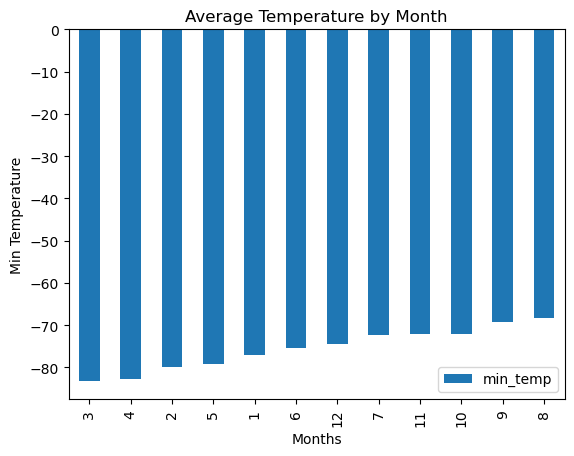

In [304]:
#Manipulating the above graph for low and high temperature
new_temp_df = temp_df.sort_values(by='min_temp', ascending=True)
# Plotting the data
plot = new_temp_df.plot(kind='bar', title="Average Temperature by Month", xlabel="Months", ylabel="Min Temperature")

# Display the plot
plt.show()

The above interpretation can be verified by graph as well
Where highest temperature is recorded in month 8 and lowest for month 3.

In [305]:
# 4. Average pressure by Martian month
avg_pressure=df.groupby("month")[["pressure"]].mean()
avg_pressure_df=pd.DataFrame(avg_pressure)
avg_pressure_df

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


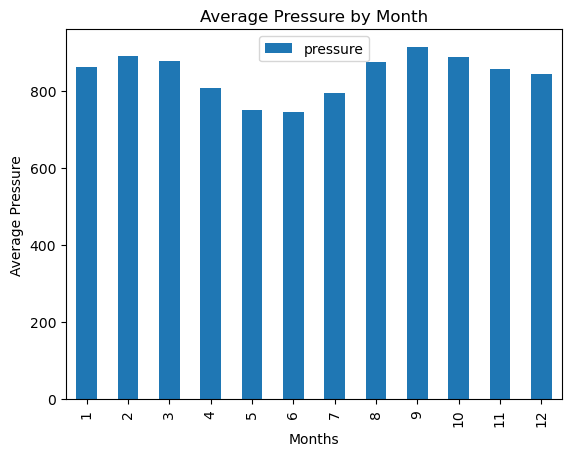

In [306]:
# Plot the average pressure by month
plot = avg_pressure_df.plot(kind='bar', title="Average Pressure by Month", xlabel="Months", ylabel="Average Pressure")
# Display the plot
plt.show()

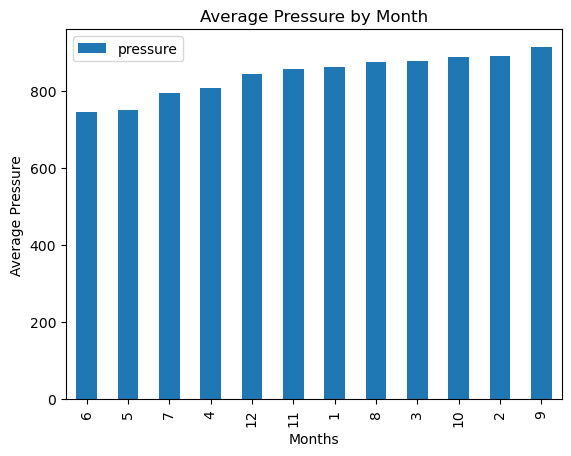

In [307]:
#Manipulating the above graph for low and high pressure
new_avg_pressure_df = avg_pressure_df.sort_values(by='pressure', ascending=True)
# Plotting the data
plot = new_avg_pressure_df.plot(kind='bar', title="Average Pressure by Month", xlabel="Months", ylabel="Average Pressure")

# Display the plot
plt.show()

In [308]:
# Identify the highest pressure and lowest pressure months in Curiosity's location
high_month = avg_pressure_df.idxmax()
high_month_pressure = avg_pressure_df.max()
low_month = avg_pressure_df.idxmin()
low_month_pressure = avg_pressure_df.min()
print(f"Month #{high_month} had the high average pressure of {high_month_pressure}")
print(f"Month #{low_month} had the low average pressure of {low_month_pressure}")

Month #pressure    9
dtype: int64 had the high average pressure of pressure    913.30597
dtype: float64
Month #pressure    6
dtype: int64 had the low average pressure of pressure    745.054422
dtype: float64


The above interpretation can be verified by graph as well Where highest pressure is recorded in month 9 and lowest for month 6.

In [309]:
# 5. How many terrestrial (earth) days are there in a Martian year?

#Finding the original Sun position
orig_pos=df['ls'].loc[0]

#the Sun longitude will be the same after Approximately 1 Martial year
# locationg the next rows where longitude is equal the orig_pos
same_pos=df.loc[df['ls']==orig_pos]
same_pos

a=same_pos['terrestrial_date'].loc[0]
date_after_one_martial_year = same_pos['terrestrial_date'].iloc[1]
one_martial_year= date_after_one_martial_year-a
print(f'In one Martial year, nearly ',one_martial_year,'pass on Earth')

In one Martial year, nearly  686 days 00:00:00 pass on Earth


Text(0.5, 1.0, 'Daily minimum temperature')

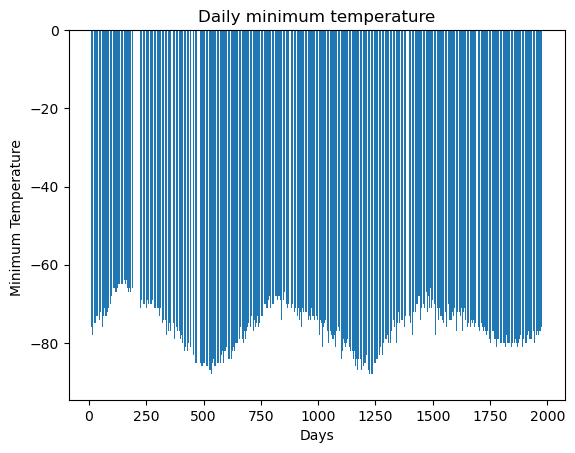

In [310]:
# Ploting the minimum temperature vs Martian Days 
plt.bar(df['sol'],df['min_temp'])

# Create labels for the x and y axes.
plt.xlabel("Days")
plt.ylabel("Minimum Temperature ")

# Create title 
plt.title('Daily minimum temperature')

Above graph explains that planet Mars circles the sun 3 times in 2000 days. This means that a Martial year is around 666 Terrestrial days (2000/3). Giving us almost the same number.

through graph=666 days
through calculation =686
which is within the visual estimate of 25%

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [311]:
# Write the data to a CSV
df.to_csv('mars_table.csv',index=False)

In [312]:
browser.quit()